# header

In [1]:
import sys
sys.path.append('/home/ubuntu/hupr')

In [10]:
import os
os.chdir('/home/ubuntu/hupr')

In [41]:
import datasets.dataset as dataset

In [7]:
from omegaconf import DictConfig, OmegaConf
cfg = OmegaConf.load('config/mscsa_prgcn.yaml')

In [37]:
from importlib import reload

In [42]:
reload(dataset)

<module 'datasets.dataset' from '/home/ubuntu/hupr/datasets/dataset.py'>

In [8]:
cfg

{'RUN': {'seed': 0, 'project': 'test', 'logdir': '${RUN.project}', 'visdir': '${RUN.project}', 'gpu': 0, 'eval': False, 'sampling_ratio': 1, 'keypoints': False, 'load_checkpoint': False, 'use_horovod': False, 'debug': False}, 'DATASET': {'upsamplingFactor': 4, 'duration': 600, 'heatmapSize': 64, 'imgSize': 256, 'rangeSize': 64, 'azimuthSize': 64, 'elevationSize': 8, 'numKeypoints': 14, 'numFrames': 8, 'numGroupFrames': 8, 'numChirps': 16, 'dataDir': 'data/HuPR', 'testName': [15, 16, 38, 40, 41, 42, 17, 39, 244, 245, 246, 249, 250, 251, 252, 253, 254, 247, 248, 255, 256], 'valName': [1, 14, 34, 57, 65, 98, 56, 99, 159, 178, 101, 120, 137, 156, 161, 164, 181, 194, 197, 205, 257], 'trainName': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 58, 59, 60, 61, 62, 63, 64, 66, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 31, 32, 53, 54, 55, 67, 68,

In [89]:
def show_np(nparray, cmap='viridis'):
    import numpy as np
    import matplotlib.pyplot as plt

    # Plot the array as an image
    plt.imshow(nparray, cmap=cmap)
    plt.colorbar()
    plt.show()

# load data (v2)

In [44]:
dataset_hupr = dataset.HuPR3D_horivert('test', cfg)

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [60]:
hori, vert = dataset_hupr.__getitem__test__(0)

In [61]:
len(hori) # load adjacent 8 frames to detect temporal information

8

In [64]:
hori[0].shape # number of chirps, H*W*E

(16, 64, 64, 8)

In [69]:
hori0real, hori0imag = hori[0][0].real, hori[0][0].imag

In [88]:
hori[0].imag.shape

(16, 64, 64, 8)

In [75]:
hori0amplitude = np.sqrt(hori0real ** 2 + hori0imag ** 2)

# visualize data (v2)

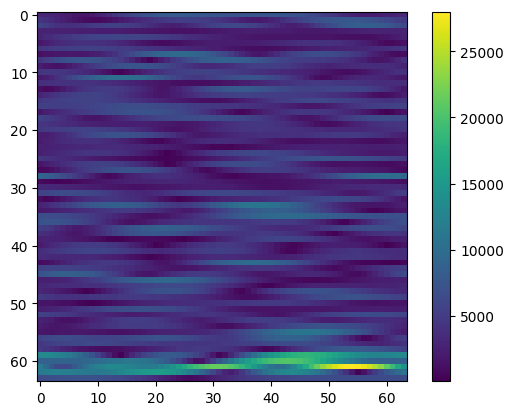

In [99]:
show_np(hori0amplitude[:, :, 0])

In [93]:
hori0amplitude[:, :, 0]

array([[ 3115.09914259,  3045.88004753,  2902.03158189, ...,
         2884.89046019,  3028.02519389,  3107.92981825],
       [ 4305.55531679,  3838.8998649 ,  3377.12945684, ...,
         5673.91355951,  5229.95290618,  4771.41771507],
       [ 5656.10015568,  5083.76619616,  4567.8791854 , ...,
         7324.49099411,  6807.99736114,  6242.47582876],
       ...,
       [11924.17611358,  9647.55486257,  7696.77011088, ...,
        19056.11607255, 16738.43222226, 14330.35768953],
       [11380.04581681, 11834.7193577 , 12103.75825967, ...,
         8852.71570516,  9886.70831507, 10731.08171451],
       [ 6593.68832924,  6678.51868504,  6766.59444603, ...,
         6396.86594427,  6450.20806989,  6516.49160218]])

(array([ 80., 171., 320., 376., 410., 375., 346., 388., 332., 271., 225.,
        193., 155.,  85.,  59.,  62.,  35.,  38.,  15.,  21.,  13.,  19.,
         11.,  18.,   3.,   8.,   4.,  10.,   2.,   3.,   6.,   3.,   7.,
          2.,   4.,   3.,   6.,   3.,   3.,   0.,   0.,   2.,   0.,   0.,
          2.,   0.,   1.,   1.,   2.,   3.]),
 array([   66.12600504,   624.30747919,  1182.48895334,  1740.6704275 ,
         2298.85190165,  2857.0333758 ,  3415.21484995,  3973.3963241 ,
         4531.57779825,  5089.7592724 ,  5647.94074655,  6206.1222207 ,
         6764.30369485,  7322.485169  ,  7880.66664316,  8438.84811731,
         8997.02959146,  9555.21106561, 10113.39253976, 10671.57401391,
        11229.75548806, 11787.93696221, 12346.11843636, 12904.29991051,
        13462.48138466, 14020.66285882, 14578.84433297, 15137.02580712,
        15695.20728127, 16253.38875542, 16811.57022957, 17369.75170372,
        17927.93317787, 18486.11465202, 19044.29612617, 19602.47760033,
        20

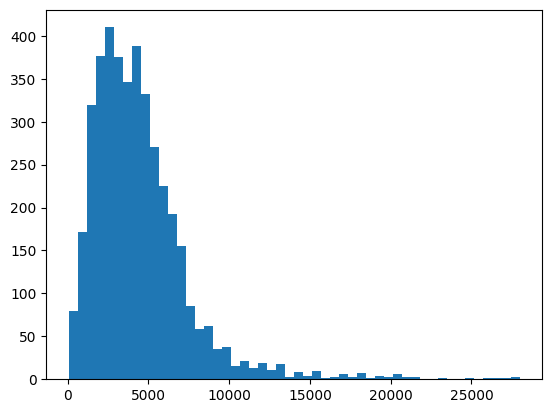

In [98]:
plt.hist(hori0amplitude[:, :, 0].flatten(), bins=50)

# load data (v1)

In [43]:
dataset_hupr = dataset.HuPR3D_horivert('test', cfg)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [13]:
data = dataset_hupr.__getitem__(0)

In [16]:
data['VRDAEmap_hori'].shape

torch.Size([8, 8, 2, 64, 64, 8])

In [19]:
data0 = data['VRDAEmap_hori'][0, 0]

In [22]:
data0real, data0img = data0[0], data0[1]

In [24]:
data0real.shape

torch.Size([64, 64, 8])

In [26]:
data0real[:, :, 0].numpy()

array([[-0.8110642 , -0.6407736 , -0.45091075, ..., -1.0625966 ,
        -1.041655  , -0.9505839 ],
       [ 2.9137552 ,  2.4915862 ,  1.7826746 , ...,  2.007295  ,
         2.6502047 ,  2.970927  ],
       [ 0.00567212,  0.32315195,  0.6921735 , ..., -0.30754527,
        -0.31128028, -0.21166936],
       ...,
       [ 0.5732637 ,  0.59590757,  0.4951532 , ..., -0.27542531,
         0.11212558,  0.4083939 ],
       [ 0.39673528,  0.6871756 ,  0.8358223 , ..., -0.918632  ,
        -0.46765032, -0.00595781],
       [-1.538923  , -0.96159214, -0.22664885, ..., -1.7039913 ,
        -1.9189326 , -1.8704259 ]], dtype=float32)

In [31]:
data0amplitude = (data0real ** 2 + data0img ** 2).sqrt()

# check data (v1)

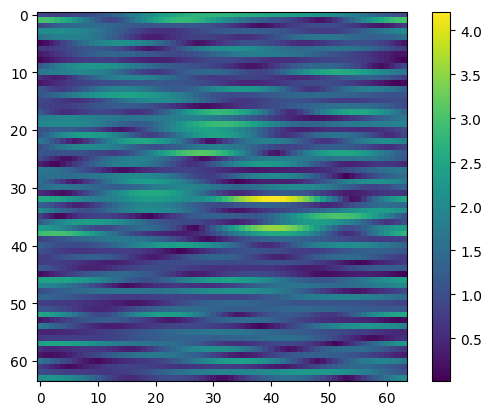

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the array as an image
plt.imshow(data0amplitude[:, :, 0].numpy(), cmap='viridis')
plt.colorbar()
plt.show()

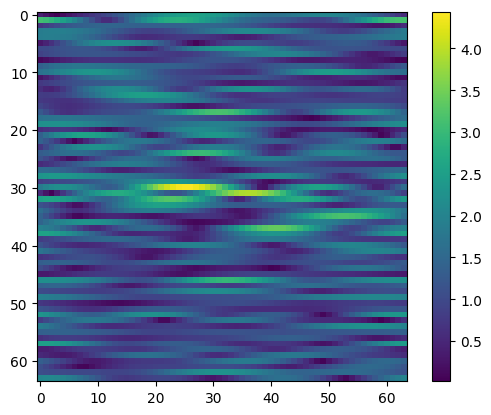

In [34]:
plt.imshow(data0amplitude[:, :, 1].numpy(), cmap='viridis')
plt.colorbar()
plt.show()